# Libraries and Such

In [ ]:
import numpy as np
from scipy.optimize import minimize
#!python -m pip install -U pandas
import pandas as pd
import itertools
import jax.numpy as jnp
from jax import random as jrandom
from jax import nn as jnn
from jax import jit
import numpy as np
import random
import math
import time
import sys
import jax
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint
from scipy import stats
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
#https://gemfury.com/stream/python:scipy/-/content/optimize/slsqp.py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Optimization Functions and Constraints

In [ ]:
#https://docs.scipy.org/doc/scipy/tutorial/optimize.html
#https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8 
#https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html#optimize-minimize-slsqp 
#http://apmonitor.com/che263/index.php/Main/PythonOptimization 
#https://stackoverflow.com/questions/26882087/python-scipy-optimization-minimize-using-slsqp-showing-maximized-results
#https://aleksandarhaber.com/solve-constrained-optimization-problems-in-python-by-using-scipy-library-and-minimize-function/ 
#https://aleksandarhaber.com/solve-optimization-problems-in-python-by-using-scipy-library/

# Fitness Evaluation

In [ ]:
#https://docs.python.org/3/library/math.html
#http://hplgit.github.io/primer.html/doc/pub/funcif/._funcif-solarized001.html#:~:text=All%20Python%20functions%20begin%20with,the%20function%20must%20be%20indented.
def pen(a,b):
  
  def func3(x):
    return math.sqrt((math.pow(x[0]-a,2))+(math.pow(x[1]-b,2))) 

  bound = (0.0,1.0)
  bnds = (bound,bound)

  ineq_cons = {'type': 'ineq', 'fun' : lambda x : x[0] + x[1] - 1}
  result = minimize(func3, x0 = [0.5, 0.5], method='SLSQP', constraints=ineq_cons, bounds = bnds)
  shadowX = result.x[0]
  #print(shadowX)
  #result2 = minimize(func2, x0 = [x,y], method='SLSQP', constraints=ineq_cons, bounds = bnds)
  shadowY = result.x[1]
  #if y < 0:
   # shadowX = 1
  #else:
   # shadowX = 1 - y
  #if x < 0.5:  
   # shadowY = 0.5
  #else:
   # shadowY = 1 - x
  pen = math.sqrt((math.pow(shadowX-a,2))+(math.pow(shadowY-b,2))) 
  #pen =  math.sqrt((math.pow(x - shadowX, 2))+(math.pow(y-shadowY,2))) 
  return pen

# Replacement Function

In [ ]:
def minSearch(xMin):
  return xMin - (xMin - 0)*(math.pow(0.99,k))
def maxSearch(xMax):
  return xMax + (1 - xMax)*(math.pow(0.99,k))
def maxYSearch(yMax):
  return yMax + (1 - yMax)*(math.pow(0.99,k))

# Linear Regression Functions

In [ ]:
#https://www.w3schools.com/python/python_ml_linear_regression.asp 
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
#https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

def regressLine(xVal, m, yInt): #returns the y value of any x coordinate on the line 
  return m * xVal + yInt

#def regLine(xVal): #returns the y value of any x coordinate on the line 
 # return m * xVal + yInt

#new try
#https://realpython.com/linear-regression-in-python/

linReg = LinearRegression()

# Randomize Function

In [ ]:
def randomY(maxY, minY):
  return random.uniform(minY, maxY)

# Declaring All Arrays

In [ ]:
#https://www.studytonight.com/python-howtos/how-to-declare-an-array-in-python
#https://linuxhint.com/numpy-create-2d-array/
#https://www.pluralsight.com/guides/different-ways-create-numpy-arrays
setXYP = np.zeros(3000)
setXYP = setXYP.reshape(1000,3)

setX = np.empty(1000, dtype=object)
setY = np.empty(1000, dtype=object)
penPts = np.zeros(1000, dtype=object)
ptNumbers = np.zeros(1000, dtype=object)
penSelection = np.empty(300, dtype=object)
penNo = np.empty(700, dtype=object)
newX = np.empty(300, dtype=float).reshape(-1,1)
newY = np.empty(300, dtype=float)
yReg = np.empty(700, dtype=float)
minY = np.empty(700, dtype=float)
maxY = np.empty(700, dtype=float)
#m = np.empty(1000, dtype=object)
#yInt = np.empty(1000, dtype=object)


# Runthrough of Code

<function pen at 0x7feaa9376cb0>
1 f(x) =  [-0.47065229] *x + 1.0033809731145698
<function pen at 0x7feaa9376cb0>
2 f(x) =  [-0.45206693] *x + 0.990194564108071
<function pen at 0x7feaa9376cb0>
3 f(x) =  [-0.50505757] *x + 1.0285828303709403
<function pen at 0x7feaa9376cb0>
4 f(x) =  [-0.53584659] *x + 1.0529980511319486
<function pen at 0x7feaa9376cb0>
5 f(x) =  [-0.5246316] *x + 1.0504435497625129
<function pen at 0x7feaa9376cb0>
6 f(x) =  [-0.54810971] *x + 1.045450385630685
<function pen at 0x7feaa9376cb0>
7 f(x) =  [-0.54461131] *x + 1.0448632184412259
<function pen at 0x7feaa9376cb0>
8 f(x) =  [-0.56771811] *x + 1.0592308097923189
<function pen at 0x7feaa9376cb0>
9 f(x) =  [-0.59248235] *x + 1.0730998590867502
<function pen at 0x7feaa9376cb0>
10 f(x) =  [-0.57006618] *x + 1.0613254075253447


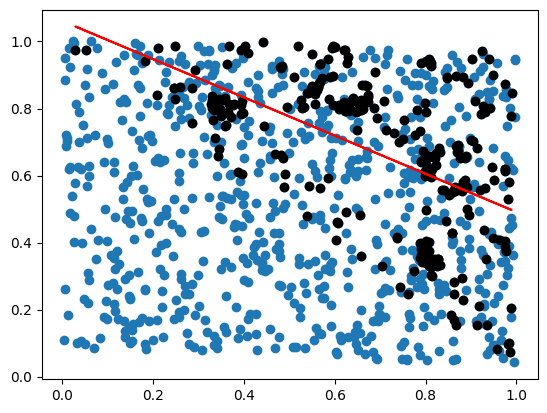

<function pen at 0x7feaa9376cb0>
11 f(x) =  [-0.56807003] *x + 1.0558405826298056
<function pen at 0x7feaa9376cb0>
12 f(x) =  [-0.58457706] *x + 1.0661321419812722
<function pen at 0x7feaa9376cb0>
13 f(x) =  [-0.61206106] *x + 1.078227484992832
<function pen at 0x7feaa9376cb0>
14 f(x) =  [-0.59405222] *x + 1.0672479189230495
<function pen at 0x7feaa9376cb0>
15 f(x) =  [-0.57858632] *x + 1.0592520219323003
<function pen at 0x7feaa9376cb0>
16 f(x) =  [-0.60912408] *x + 1.0736448883606202
<function pen at 0x7feaa9376cb0>
17 f(x) =  [-0.61695044] *x + 1.0735482405741985
<function pen at 0x7feaa9376cb0>
18 f(x) =  [-0.63708696] *x + 1.0797940525500263
<function pen at 0x7feaa9376cb0>
19 f(x) =  [-0.62336082] *x + 1.0712128361832705
<function pen at 0x7feaa9376cb0>
20 f(x) =  [-0.60201915] *x + 1.0631506596054063


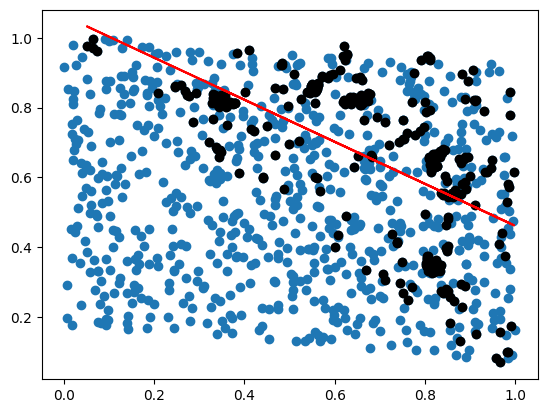

<function pen at 0x7feaa9376cb0>
21 f(x) =  [-0.62434204] *x + 1.0785017629463602
<function pen at 0x7feaa9376cb0>
22 f(x) =  [-0.64866269] *x + 1.0923632145330682
<function pen at 0x7feaa9376cb0>
23 f(x) =  [-0.64679726] *x + 1.092758827690566
<function pen at 0x7feaa9376cb0>
24 f(x) =  [-0.6281942] *x + 1.0830411401115114
<function pen at 0x7feaa9376cb0>
25 f(x) =  [-0.61611282] *x + 1.0820122122241023
<function pen at 0x7feaa9376cb0>
26 f(x) =  [-0.62753181] *x + 1.0917895432111573
<function pen at 0x7feaa9376cb0>
27 f(x) =  [-0.63625349] *x + 1.0982286622364674
<function pen at 0x7feaa9376cb0>
28 f(x) =  [-0.64753316] *x + 1.1047032167101467
<function pen at 0x7feaa9376cb0>
29 f(x) =  [-0.66477871] *x + 1.119227752913357
<function pen at 0x7feaa9376cb0>
30 f(x) =  [-0.65207495] *x + 1.1075717778186625


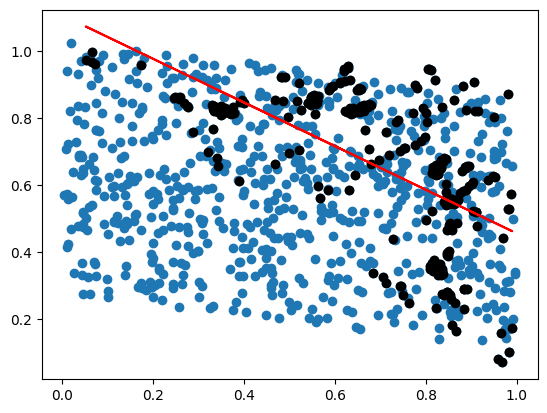

<function pen at 0x7feaa9376cb0>
31 f(x) =  [-0.66363971] *x + 1.1113832857710624
<function pen at 0x7feaa9376cb0>
32 f(x) =  [-0.644674] *x + 1.0966643811409744
<function pen at 0x7feaa9376cb0>
33 f(x) =  [-0.65583259] *x + 1.1076569562272838
<function pen at 0x7feaa9376cb0>
34 f(x) =  [-0.6410378] *x + 1.0989831525176157
<function pen at 0x7feaa9376cb0>
35 f(x) =  [-0.63551321] *x + 1.0902837495834201
<function pen at 0x7feaa9376cb0>
36 f(x) =  [-0.64448847] *x + 1.0925920395077824
<function pen at 0x7feaa9376cb0>
37 f(x) =  [-0.63592133] *x + 1.083193588196611
<function pen at 0x7feaa9376cb0>
38 f(x) =  [-0.63695818] *x + 1.0825683977972829
<function pen at 0x7feaa9376cb0>
39 f(x) =  [-0.64742663] *x + 1.0841956050560622
<function pen at 0x7feaa9376cb0>
40 f(x) =  [-0.64688159] *x + 1.0826025498243992


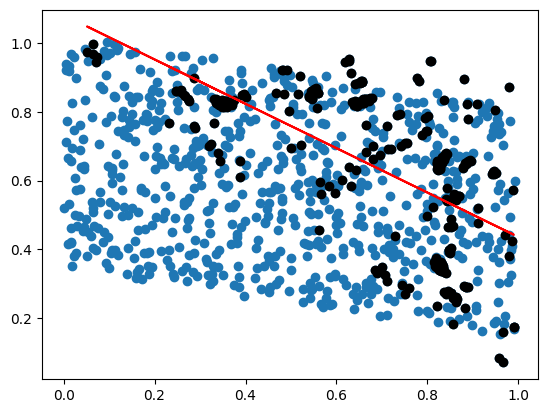

<function pen at 0x7feaa9376cb0>
41 f(x) =  [-0.63951845] *x + 1.0774841683324563
<function pen at 0x7feaa9376cb0>
42 f(x) =  [-0.64019612] *x + 1.0765978194740509
<function pen at 0x7feaa9376cb0>
43 f(x) =  [-0.6466375] *x + 1.0789129695522381
<function pen at 0x7feaa9376cb0>
44 f(x) =  [-0.64802216] *x + 1.0804329899568608
<function pen at 0x7feaa9376cb0>
45 f(x) =  [-0.64579661] *x + 1.0798755149739152
<function pen at 0x7feaa9376cb0>
46 f(x) =  [-0.64572313] *x + 1.0798754970774036
<function pen at 0x7feaa9376cb0>
47 f(x) =  [-0.64909349] *x + 1.0823661354252676
<function pen at 0x7feaa9376cb0>
48 f(x) =  [-0.64675079] *x + 1.0812219806493975
<function pen at 0x7feaa9376cb0>
49 f(x) =  [-0.6489758] *x + 1.0851686239087865
<function pen at 0x7feaa9376cb0>
50 f(x) =  [-0.66349885] *x + 1.092757333643251


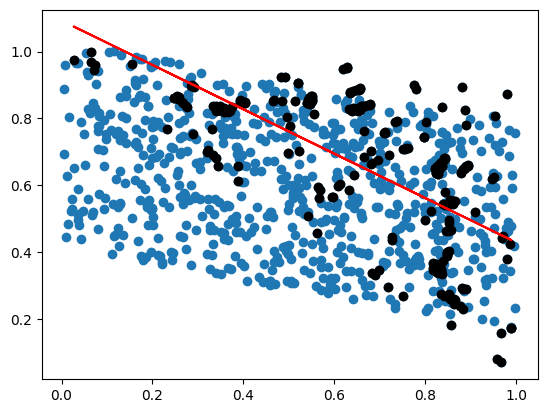

<function pen at 0x7feaa9376cb0>
51 f(x) =  [-0.6544154] *x + 1.0915249361097819
<function pen at 0x7feaa9376cb0>
52 f(x) =  [-0.64878428] *x + 1.0882773031607558
<function pen at 0x7feaa9376cb0>
53 f(x) =  [-0.65268721] *x + 1.0904130921852335
<function pen at 0x7feaa9376cb0>
54 f(x) =  [-0.65642028] *x + 1.0916281150809015
<function pen at 0x7feaa9376cb0>
55 f(x) =  [-0.66307812] *x + 1.0942651123512361
<function pen at 0x7feaa9376cb0>
56 f(x) =  [-0.66770726] *x + 1.0959076292415957
<function pen at 0x7feaa9376cb0>
57 f(x) =  [-0.65242652] *x + 1.0880855742956936
<function pen at 0x7feaa9376cb0>
58 f(x) =  [-0.64589708] *x + 1.0873746715774733
<function pen at 0x7feaa9376cb0>
59 f(x) =  [-0.65144302] *x + 1.0907645706173728
<function pen at 0x7feaa9376cb0>
60 f(x) =  [-0.65932924] *x + 1.0968735947883583


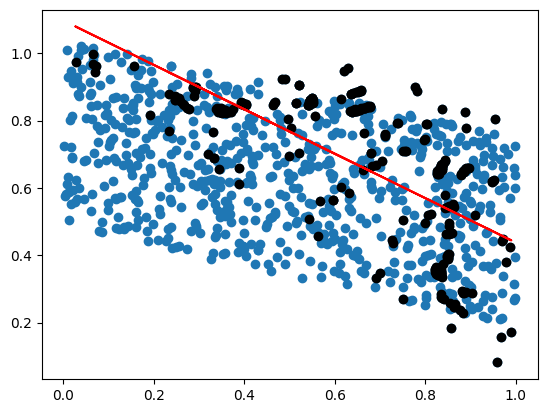

<function pen at 0x7feaa9376cb0>
61 f(x) =  [-0.66688753] *x + 1.0983895781149144
<function pen at 0x7feaa9376cb0>
62 f(x) =  [-0.66895767] *x + 1.1007409060648907
<function pen at 0x7feaa9376cb0>
63 f(x) =  [-0.66251212] *x + 1.0976266315243692
<function pen at 0x7feaa9376cb0>
64 f(x) =  [-0.66836381] *x + 1.097844221456136
<function pen at 0x7feaa9376cb0>
65 f(x) =  [-0.66536433] *x + 1.0952545918489638
<function pen at 0x7feaa9376cb0>
66 f(x) =  [-0.66223458] *x + 1.0931943630110277
<function pen at 0x7feaa9376cb0>
67 f(x) =  [-0.66733725] *x + 1.0955687612435048
<function pen at 0x7feaa9376cb0>
68 f(x) =  [-0.66369764] *x + 1.0941975347503115
<function pen at 0x7feaa9376cb0>
69 f(x) =  [-0.66186637] *x + 1.0900937300826277
<function pen at 0x7feaa9376cb0>
70 f(x) =  [-0.66086595] *x + 1.090407586609618


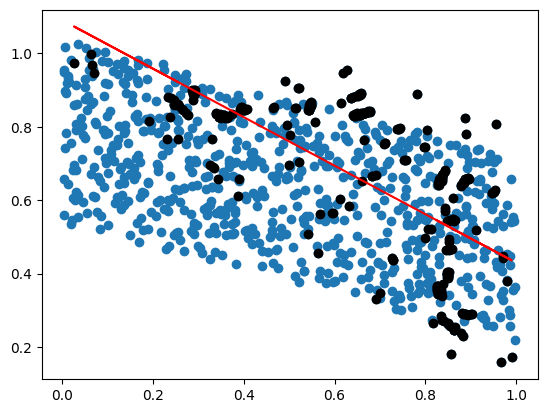

<function pen at 0x7feaa9376cb0>
71 f(x) =  [-0.66001412] *x + 1.0887651386578105
<function pen at 0x7feaa9376cb0>
72 f(x) =  [-0.65680829] *x + 1.0871781807829817
<function pen at 0x7feaa9376cb0>
73 f(x) =  [-0.66103396] *x + 1.089633571581262
<function pen at 0x7feaa9376cb0>
74 f(x) =  [-0.6629827] *x + 1.0904143424102704
<function pen at 0x7feaa9376cb0>
75 f(x) =  [-0.66915093] *x + 1.0951405004076349
<function pen at 0x7feaa9376cb0>
76 f(x) =  [-0.67545432] *x + 1.099587168220098
<function pen at 0x7feaa9376cb0>
77 f(x) =  [-0.68044846] *x + 1.1029401659644966
<function pen at 0x7feaa9376cb0>
78 f(x) =  [-0.67306943] *x + 1.0969423800270137
<function pen at 0x7feaa9376cb0>
79 f(x) =  [-0.67279844] *x + 1.0968414231826968
<function pen at 0x7feaa9376cb0>
80 f(x) =  [-0.67555175] *x + 1.0971169443876805


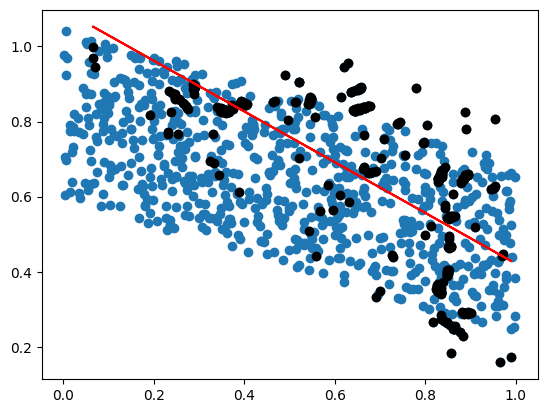

<function pen at 0x7feaa9376cb0>
81 f(x) =  [-0.67004237] *x + 1.0941303644698415
<function pen at 0x7feaa9376cb0>
82 f(x) =  [-0.67004237] *x + 1.0941303644698415
<function pen at 0x7feaa9376cb0>
83 f(x) =  [-0.67371704] *x + 1.0960394083678353
<function pen at 0x7feaa9376cb0>
84 f(x) =  [-0.66848538] *x + 1.090735715095542
<function pen at 0x7feaa9376cb0>
85 f(x) =  [-0.66455724] *x + 1.0878733995029313
<function pen at 0x7feaa9376cb0>
86 f(x) =  [-0.66791446] *x + 1.0883440283224983
<function pen at 0x7feaa9376cb0>
87 f(x) =  [-0.66532556] *x + 1.0867372339458947
<function pen at 0x7feaa9376cb0>
88 f(x) =  [-0.66377367] *x + 1.0858011839022954
<function pen at 0x7feaa9376cb0>
89 f(x) =  [-0.66151217] *x + 1.0853665806447828
<function pen at 0x7feaa9376cb0>
90 f(x) =  [-0.66067834] *x + 1.0855886892123183


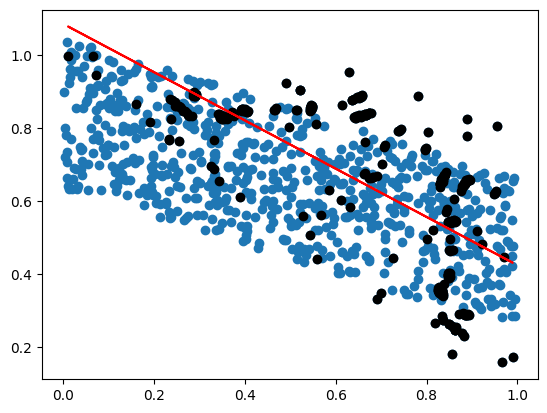

<function pen at 0x7feaa9376cb0>
91 f(x) =  [-0.65806153] *x + 1.0821985007072972
<function pen at 0x7feaa9376cb0>
92 f(x) =  [-0.65795648] *x + 1.0816828402969376
<function pen at 0x7feaa9376cb0>
93 f(x) =  [-0.65477551] *x + 1.076833334548665
<function pen at 0x7feaa9376cb0>
94 f(x) =  [-0.64943274] *x + 1.072285784105337
<function pen at 0x7feaa9376cb0>
95 f(x) =  [-0.64065293] *x + 1.0691985909526593
<function pen at 0x7feaa9376cb0>
96 f(x) =  [-0.63897884] *x + 1.068730880829158
<function pen at 0x7feaa9376cb0>
97 f(x) =  [-0.64590134] *x + 1.0711098725120902
<function pen at 0x7feaa9376cb0>
98 f(x) =  [-0.64522644] *x + 1.0713423403510924
<function pen at 0x7feaa9376cb0>


KeyboardInterrupt: ignored

In [ ]:
#initializing all of the points
from ctypes import set_errno

num = 1

#https://docs.python.org/3/library/random.html
  
setX = np.random.uniform(low=0.0, high=1.0, size = 1000)  
setY = np.random.uniform(low=0.0, high=1.0, size = 1000)  
#set all of the points at once

#print(setX)
#print(setY)

setXYP[:,0] = setX
setXYP[:,1] = setY

#print(setXYP)

#https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/
lowXpoint = np.min(setXYP[:,0])
highXpoint = np.max(setXYP[:,1])

#running through the algorithm

for k in range (0, 1000):
#set as iteration instead
  #https://blog.finxter.com/how-to-apply-a-function-to-each-element-of-a-list/#:~:text=The%20best%20way%20to%20apply,is%20to%20use%20list%20comprehension.
  func = map(pen, setXYP[:,0], setXYP[:,1])
  print(pen)
  setXYP[:,2] = np.fromiter(func,dtype=float)#,dtype=float
  setXYP = setXYP[setXYP[:,2].argsort()] #https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column
  #https://thispointer.com/sorting-2d-numpy-array-by-column-or-row-in-python/
  #print(setXYP)
#inputs the best values into an array of 100 for the best points


  newX = setXYP[:299,0]
  newY = setXYP[:299,1]

  newX = newX.reshape(-1,1)

#this selected the numbers of the different points that were the 100 best  


#linear regression and graphing

#https://www.w3schools.com/python/python_ml_linear_regression.asp 
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
#https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
#https://www.statology.org/numpy-get-row/

  linReg.fit(newX, newY)
  print(num, 'f(x) = ', linReg.coef_,'*x +', linReg.intercept_)
#from above
  #m, yInt, r, p, std_err = stats.linregress(newX, newY)

#from above
  m = linReg.coef_
  yInt = linReg.intercept_

  def regLine(xVal): #returns the y value of any x coordinate on the line 
    return m * xVal + yInt

  line = list(map(regLine, newX))

  #print('f(x) = ', m, '* x + ', yInt)

  if num % 10 == 0:
    plt.scatter(setXYP[:,0], setXYP[:,1])
    plt.scatter(newX, newY, color = 'k')
    plt.plot(newX, line, color='r')

  plt.show()

#replace points 100-1000

  minXBound = minSearch(lowXpoint)
  maxXBound = maxSearch(highXpoint)

  
  setXYP[300:1000,0] = np.random.uniform(low = minXBound, high = maxXBound, size = 700)


#find regression point first! then use that in the bounds

  #func = map(pen, setXYP[:,0], setXYP[:,1])
  #setXYP[:,2] = np.fromiter(func,dtype=float)

  yreg = map(regLine, setXYP[300:1000,0])
  yReg = np.fromiter(yreg,dtype=float)

  min_y = map(minSearch, yReg)
  minY = np.fromiter(min_y,dtype=float)
  
  max_y = map(maxYSearch, yReg)
  maxY = np.fromiter(max_y,dtype=float)
  
  newY = map(randomY, minY, maxY)
  setXYP[300:1000,1] = np.fromiter(newY,dtype=float)

#https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/
  lowXpoint = np.min(setXYP[:,0])
  highXpoint = np.max(setXYP[:,0])
  num += 1

#prints the entirety of points at the end of all iterations

print(setXYP[:,0], setXYP[:,1])

plt.scatter(setXYP[:,0], setXYP[:,1])
plt.plot(newX, line, color='r')

plt.show()
